# Explore Nightly Epoch Lightcurves

Contact: Melissa Graham

Explore the lightcurves and lightcurve parameters created by `create_nightly_epoch_lightcurves.ipynb`.

Plot histograms and correlations of the lightcurve parameters (time span, amplitude, minimum magnitude, number of epochs).

Plot the lightcurves of some samples of candidates (the 25 brightest, largest amplitude, etc.).

## 0. Set up

Import packages, define plot parameters, and read in the data.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.time import Time
import time

Colors to use for COSMOS-g, -r, -i and ELAIS-g, -r, -i

In [2]:
all_filters = ['g', 'r', 'i']
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']
sym = ['o', 's', '^', 'o', 's', '^']
siz = [5, 5, 7, 5, 5, 7]

Define semester start dates.

In [3]:
semesters = ['21A', '21B', '22A', '22B', '23A']
sem_dates_isot = ['2021-02-01T00:00:00',
                  '2021-08-01T00:00:00',
                  '2022-02-01T00:00:00',
                  '2022-08-01T00:00:00',
                       '2023-02-01T00:00:00',
             '2023-08-01T00:00:00']
sem_dates = Time(sem_dates_isot, format='isot', scale='utc')

### 0.1. Read in the candidate lightcurves

In [4]:
fnm = 'all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

Check on the number of unique candidates and epochs in COSMOS and ELAIS.

In [5]:
cx = np.where(candLC_field == 'COSMOS')[0]
ex = np.where(candLC_field == 'ELAIS')[0]

all_cosmos_epochs = np.unique(np.sort(candLC_caldate[cx]))
all_elais_epochs = np.unique(np.sort(candLC_caldate[ex]))
all_cosmos_candids = np.unique(np.sort(candLC_candid[cx]))
all_elais_candids = np.unique(np.sort(candLC_candid[ex]))

print(len(all_cosmos_epochs), ' unique COSMOS epochs.')
print(len(all_elais_epochs), ' unique ELAIS epochs.')
print(len(all_cosmos_candids), ' unique COSMOS candidates')
print(len(all_elais_candids), ' unique ELAIS candidates')
print(len(all_cosmos_candids) + len(all_elais_candids), ' total')
del cx, ex

84  unique COSMOS epochs.
97  unique ELAIS epochs.
1089  unique COSMOS candidates
931  unique ELAIS candidates
2020  total


### 0.2. Read in the lightcurve summary parameters

In [6]:
fnm = 'all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
paramLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
paramLC_tspan = np.loadtxt(fnm, dtype='float', usecols=(2))
paramLC_tspan_g = np.loadtxt(fnm, dtype='float', usecols=(3))
paramLC_tspan_r = np.loadtxt(fnm, dtype='float', usecols=(4))
paramLC_tspan_i = np.loadtxt(fnm, dtype='float', usecols=(5))
paramLC_minmag = np.loadtxt(fnm, dtype='float', usecols=(6))
paramLC_minmag_g = np.loadtxt(fnm, dtype='float', usecols=(7))
paramLC_minmag_r = np.loadtxt(fnm, dtype='float', usecols=(8))
paramLC_minmag_i = np.loadtxt(fnm, dtype='float', usecols=(9))
paramLC_amp = np.loadtxt(fnm, dtype='float', usecols=(10))
paramLC_amp_g = np.loadtxt(fnm, dtype='float', usecols=(11))
paramLC_amp_r = np.loadtxt(fnm, dtype='float', usecols=(12))
paramLC_amp_i = np.loadtxt(fnm, dtype='float', usecols=(13))
paramLC_neps = np.loadtxt(fnm, dtype='int', usecols=(14))
paramLC_neps_g = np.loadtxt(fnm, dtype='int', usecols=(15))
paramLC_neps_r = np.loadtxt(fnm, dtype='int', usecols=(16))
paramLC_neps_i = np.loadtxt(fnm, dtype='int', usecols=(17))

del fnm

How many candidates have no nightly-epoch photometry?

In [7]:
cx = np.where((paramLC_field == 'COSMOS') & (paramLC_neps == 0))[0]
ex = np.where((paramLC_field == 'ELAIS') & (paramLC_neps == 0))[0]
cx_g = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_g == 0))[0]
ex_g = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_g == 0))[0]
cx_r = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_r == 0))[0]
ex_r = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_r == 0))[0]
cx_i = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_i == 0))[0]
ex_i = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_i == 0))[0]

print('Number of candidates with NO epochs (any, g, r, i).')
print('COSMOS: ', len(cx),len(cx_g),len(cx_r),len(cx_i))
print('ELAIS:  ', len(ex),len(ex_g),len(ex_r),len(ex_i))
print(' ')
del cx, ex, cx_g, cx_r, cx_i, ex_g, ex_r, ex_i

Number of candidates with NO epochs (any, g, r, i).
COSMOS:  0 171 71 100
ELAIS:   0 210 130 121
 


How many candidates have just one epoch?

In [8]:
cx = np.where((paramLC_field == 'COSMOS') & (paramLC_neps == 1))[0]
ex = np.where((paramLC_field == 'ELAIS') & (paramLC_neps == 1))[0]
cx_g = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_g == 1))[0]
ex_g = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_g == 1))[0]
cx_r = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_r == 1))[0]
ex_r = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_r == 1))[0]
cx_i = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_i == 1))[0]
ex_i = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_i == 1))[0]

print('Number of candidates with ONE epoch (any, g, r, i).')
print('COSMOS: ', len(cx),len(cx_g),len(cx_r),len(cx_i))
print('ELAIS:  ', len(ex),len(ex_g),len(ex_r),len(ex_i))
del cx, ex, cx_g, cx_r, cx_i, ex_g, ex_r, ex_i

Number of candidates with ONE epoch (any, g, r, i).
COSMOS:  167 181 192 200
ELAIS:   5 63 53 38


The above could be real, single-night-only transients.

## 1. Histograms

### 1.1. Lightcurve summary parameters

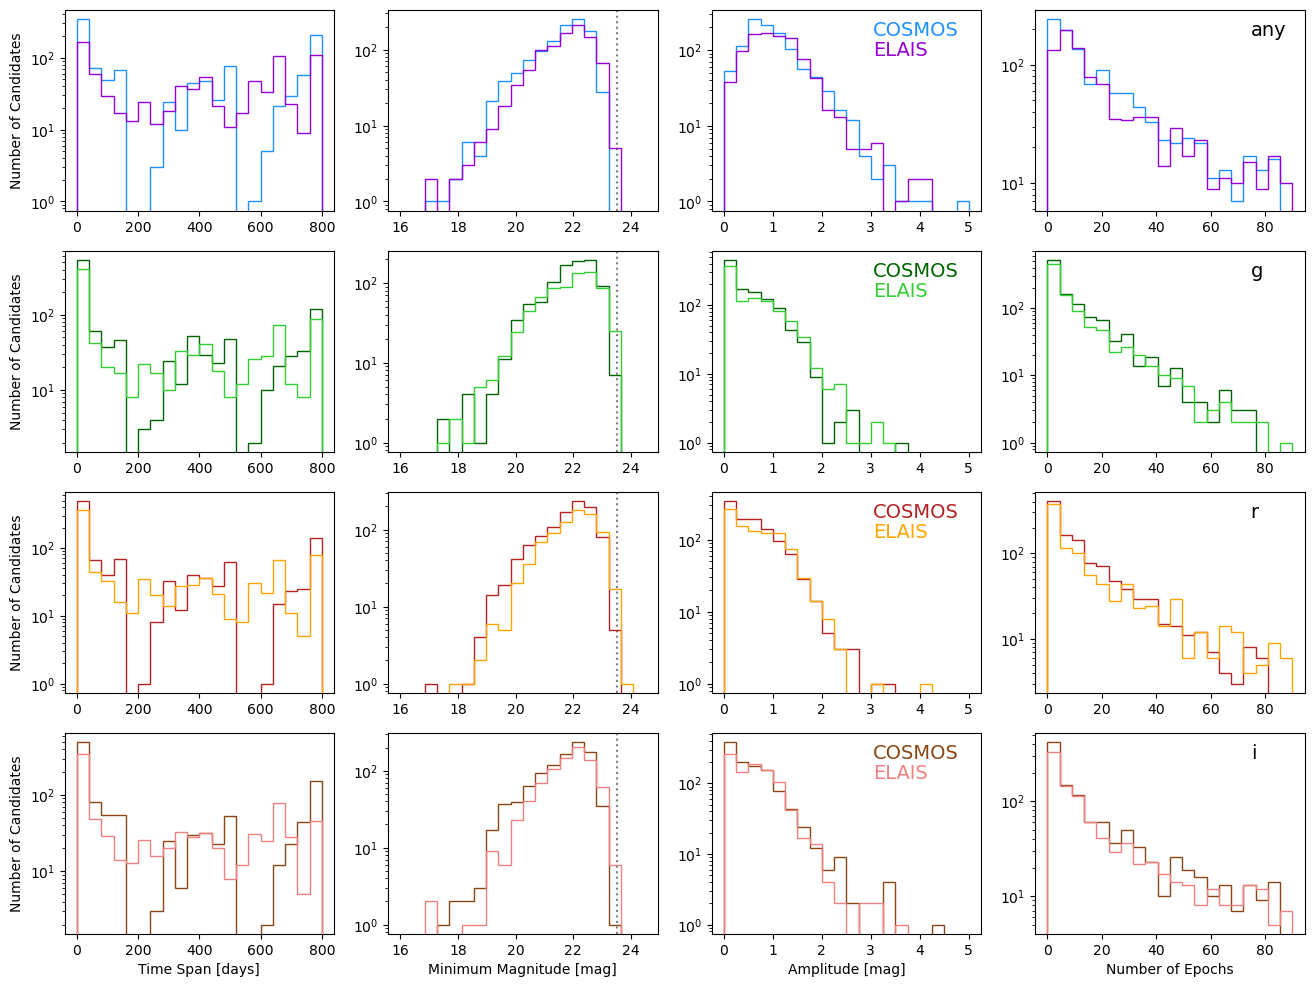

In [9]:
cx = np.where( paramLC_field == 'COSMOS' )[0]
ex = np.where( paramLC_field == 'ELAIS' )[0]

fig, ax = plt.subplots( 4, 4, figsize=(16,12), sharex=False, sharey=False )

max1 = 800
max2 = 24.5
max3 = 5
max4 = 90

ax[0,1].axvline(23.5, ls='dotted', color='grey')
ax[1,1].axvline(23.5, ls='dotted', color='grey')
ax[2,1].axvline(23.5, ls='dotted', color='grey')
ax[3,1].axvline(23.5, ls='dotted', color='grey')

ax[0,0].hist( paramLC_tspan[cx],  histtype='step', log=True, bins=20, range=(0,max1), color='dodgerblue')
ax[0,1].hist( paramLC_minmag[cx], histtype='step', log=True, bins=20, range=(16,max2), color='dodgerblue')
ax[0,2].hist( paramLC_amp[cx],    histtype='step', log=True, bins=20, range=(0,max3),   color='dodgerblue')
ax[0,3].hist( paramLC_neps[cx],   histtype='step', log=True, bins=20, range=(0,max4),  color='dodgerblue')
ax[0,0].hist( paramLC_tspan[ex],  histtype='step', log=True, bins=20, range=(0,max1), color='darkviolet')
ax[0,1].hist( paramLC_minmag[ex], histtype='step', log=True, bins=20, range=(16,max2),   color='darkviolet')
ax[0,2].hist( paramLC_amp[ex],    histtype='step', log=True, bins=20, range=(0,max3),   color='darkviolet')
ax[0,3].hist( paramLC_neps[ex],   histtype='step', log=True, bins=20, range=(0,max4), color='darkviolet')

ax[1,0].hist( paramLC_tspan_g[cx],  histtype='step', log=True, bins=20, range=(0,max1), color=clr[0])
ax[1,1].hist( paramLC_minmag_g[cx], histtype='step', log=True, bins=20, range=(16,max2), color=clr[0])
ax[1,2].hist( paramLC_amp_g[cx],    histtype='step', log=True, bins=20, range=(0,max3),   color=clr[0])
ax[1,3].hist( paramLC_neps_g[cx],   histtype='step', log=True, bins=20, range=(0,max4),  color=clr[0])
ax[1,0].hist( paramLC_tspan_g[ex],  histtype='step', log=True, bins=20, range=(0,max1), color=clr[3])
ax[1,1].hist( paramLC_minmag_g[ex], histtype='step', log=True, bins=20, range=(16,max2), color=clr[3])
ax[1,2].hist( paramLC_amp_g[ex],    histtype='step', log=True, bins=20, range=(0,max3),   color=clr[3])
ax[1,3].hist( paramLC_neps_g[ex],   histtype='step', log=True, bins=20, range=(0,max4),  color=clr[3])

ax[2,0].hist( paramLC_tspan_r[cx],  histtype='step', log=True, bins=20, range=(0,max1), color=clr[1])
ax[2,1].hist( paramLC_minmag_r[cx], histtype='step', log=True, bins=20, range=(16,max2), color=clr[1])
ax[2,2].hist( paramLC_amp_r[cx],    histtype='step', log=True, bins=20, range=(0,max3),   color=clr[1])
ax[2,3].hist( paramLC_neps_r[cx],   histtype='step', log=True, bins=20, range=(0,max4),  color=clr[1])
ax[2,0].hist( paramLC_tspan_r[ex],  histtype='step', log=True, bins=20, range=(0,max1), color=clr[4])
ax[2,1].hist( paramLC_minmag_r[ex], histtype='step', log=True, bins=20, range=(16,max2), color=clr[4])
ax[2,2].hist( paramLC_amp_r[ex],    histtype='step', log=True, bins=20, range=(0,max3),   color=clr[4])
ax[2,3].hist( paramLC_neps_r[ex],   histtype='step', log=True, bins=20, range=(0,max4),  color=clr[4])

ax[3,0].hist( paramLC_tspan_i[cx],  histtype='step', log=True, bins=20, range=(0,max1), color=clr[2])
ax[3,1].hist( paramLC_minmag_i[cx], histtype='step', log=True, bins=20, range=(16,max2), color=clr[2])
ax[3,2].hist( paramLC_amp_i[cx],    histtype='step', log=True, bins=20, range=(0,max3),   color=clr[2])
ax[3,3].hist( paramLC_neps_i[cx],   histtype='step', log=True, bins=20, range=(0,max4),  color=clr[2])
ax[3,0].hist( paramLC_tspan_i[ex],  histtype='step', log=True, bins=20, range=(0,max1), color=clr[5])
ax[3,1].hist( paramLC_minmag_i[ex], histtype='step', log=True, bins=20, range=(16,max2), color=clr[5])
ax[3,2].hist( paramLC_amp_i[ex],    histtype='step', log=True, bins=20, range=(0,max3),   color=clr[5])
ax[3,3].hist( paramLC_neps_i[ex],   histtype='step', log=True, bins=20, range=(0,max4),  color=clr[5])

ax[3,0].set_xlabel('Time Span [days]')
ax[3,1].set_xlabel('Minimum Magnitude [mag]')
ax[3,2].set_xlabel('Amplitude [mag]')
ax[3,3].set_xlabel('Number of Epochs')

ax[0,0].set_ylabel('Number of Candidates')
ax[1,0].set_ylabel('Number of Candidates')
ax[2,0].set_ylabel('Number of Candidates')
ax[3,0].set_ylabel('Number of Candidates')

ax[0,2].text(0.60, 0.85, 'COSMOS', fontsize=14, color='dodgerblue', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,2].transAxes)    
ax[0,2].text(0.60, 0.75, 'ELAIS',  fontsize=14, color='darkviolet', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,2].transAxes)    
ax[1,2].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[0], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,2].transAxes)    
ax[1,2].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[3], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,2].transAxes)    
ax[2,2].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[1], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,2].transAxes)    
ax[2,2].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[4], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,2].transAxes)    
ax[3,2].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[2], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,2].transAxes)    
ax[3,2].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[5], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,2].transAxes)    

ax[0,3].text(0.80, 0.85, 'any',fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,3].transAxes)
ax[1,3].text(0.80, 0.85, 'g',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,3].transAxes)
ax[2,3].text(0.80, 0.85, 'r',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,3].transAxes)
ax[3,3].text(0.80, 0.85, 'i',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,3].transAxes)

plt.savefig('all_nightly_epochs_files/histograms', bbox_inches='tight')
plt.show()

del cx,ex

### 1.2. Date of candidate first detection

Identify the unique candidates

In [10]:
values, indices, counts = np.unique(candLC_candid, return_index=True, return_counts=True)

Plot a histogram of the first nightly-epoch MJD for each of the unique candidates.

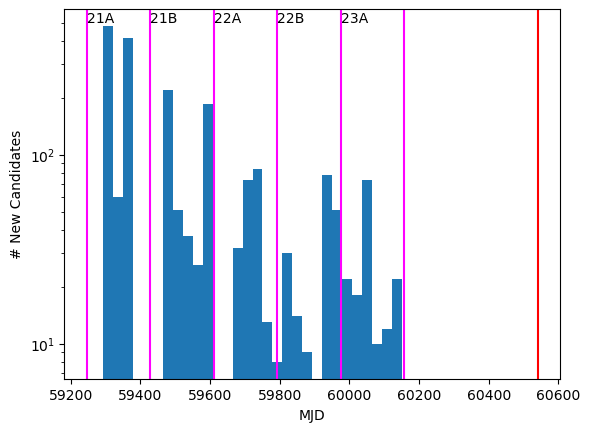

In [11]:
plt.hist(candLC_mjd[indices], bins=30, log=True)

for x in [0, 1, 2, 3, 4, 5]:
    plt.axvline(sem_dates[x].mjd, color='magenta')
for x in [0, 1, 2, 3, 4]:    
    plt.text(sem_dates[x].mjd, 500, semesters[x])
    
plt.axvline(Time.now().mjd, color='red')
plt.ylabel('# New Candidates')
plt.xlabel('MJD')
plt.show()

## 2. Scatter plots

From left to right:
time span vs. minimum magnitude, 
time span vs. lightcurve amplitude,
and lightcurve amplitude vs. minimum magnitude.

Only for candidates with more than one epoch.

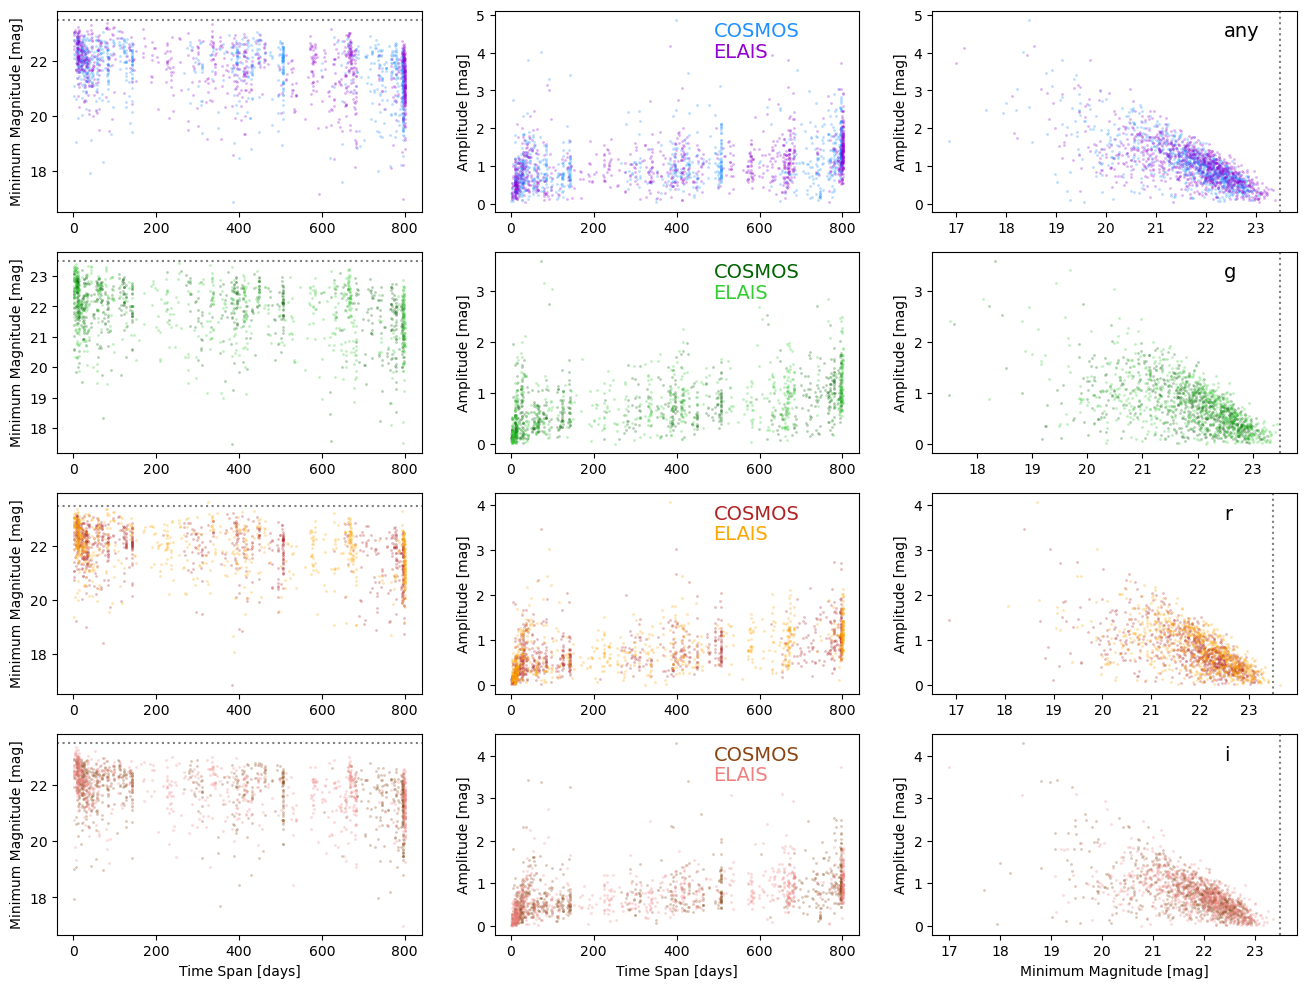

In [12]:
fig, ax = plt.subplots( 4, 3, figsize=(16, 12), sharex=False, sharey=False )

ax[0,2].axvline(23.5, ls='dotted', color='grey')
ax[1,2].axvline(23.5, ls='dotted', color='grey')
ax[2,2].axvline(23.5, ls='dotted', color='grey')
ax[3,2].axvline(23.5, ls='dotted', color='grey')
ax[0,0].axhline(23.5, ls='dotted', color='grey')
ax[1,0].axhline(23.5, ls='dotted', color='grey')
ax[2,0].axhline(23.5, ls='dotted', color='grey')
ax[3,0].axhline(23.5, ls='dotted', color='grey')

cx = np.where((paramLC_field == 'COSMOS') & (paramLC_neps > 1))[0]
ex = np.where((paramLC_field == 'ELAIS') & (paramLC_neps > 1))[0]
ax[0,0].plot( paramLC_tspan[cx],  paramLC_minmag[cx], 'o', ms=2, mew=0, alpha=0.3, color='dodgerblue')
ax[0,1].plot( paramLC_tspan[cx],  paramLC_amp[cx],    'o', ms=2, mew=0, alpha=0.3, color='dodgerblue')
ax[0,2].plot( paramLC_minmag[cx], paramLC_amp[cx],    'o', ms=2, mew=0, alpha=0.3, color='dodgerblue')
ax[0,0].plot( paramLC_tspan[ex],  paramLC_minmag[ex], 'o', ms=2, mew=0, alpha=0.3, color='darkviolet')
ax[0,1].plot( paramLC_tspan[ex],  paramLC_amp[ex],    'o', ms=2, mew=0, alpha=0.3, color='darkviolet')
ax[0,2].plot( paramLC_minmag[ex], paramLC_amp[ex],    'o', ms=2, mew=0, alpha=0.3, color='darkviolet')
del cx,ex

cx = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_g > 1))[0]
ex = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_g > 1))[0]
ax[1,0].plot( paramLC_tspan_g[cx],  paramLC_minmag_g[cx], 'o', ms=2, mew=0, alpha=0.3, color=clr[0])
ax[1,1].plot( paramLC_tspan_g[cx],  paramLC_amp_g[cx],    'o', ms=2, mew=0, alpha=0.3, color=clr[0])
ax[1,2].plot( paramLC_minmag_g[cx], paramLC_amp_g[cx],    'o', ms=2, mew=0, alpha=0.3, color=clr[0])
ax[1,0].plot( paramLC_tspan_g[ex],  paramLC_minmag_g[ex], 'o', ms=2, mew=0, alpha=0.3, color=clr[3])
ax[1,1].plot( paramLC_tspan_g[ex],  paramLC_amp_g[ex],    'o', ms=2, mew=0, alpha=0.3, color=clr[3])
ax[1,2].plot( paramLC_minmag_g[ex], paramLC_amp_g[ex],    'o', ms=2, mew=0, alpha=0.3, color=clr[3])
del cx,ex

cx = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_r > 1))[0]
ex = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_r > 1))[0]
ax[2,0].plot( paramLC_tspan_r[cx],  paramLC_minmag_r[cx], 'o', ms=2, mew=0, alpha=0.3, color=clr[1])
ax[2,1].plot( paramLC_tspan_r[cx],  paramLC_amp_r[cx],    'o', ms=2, mew=0, alpha=0.3, color=clr[1])
ax[2,2].plot( paramLC_minmag_r[cx], paramLC_amp_r[cx],    'o', ms=2, mew=0, alpha=0.3, color=clr[1])
ax[2,0].plot( paramLC_tspan_r[ex],  paramLC_minmag_r[ex], 'o', ms=2, mew=0, alpha=0.3, color=clr[4])
ax[2,1].plot( paramLC_tspan_r[ex],  paramLC_amp_r[ex],    'o', ms=2, mew=0, alpha=0.3, color=clr[4])
ax[2,2].plot( paramLC_minmag_r[ex], paramLC_amp_r[ex],    'o', ms=2, mew=0, alpha=0.3, color=clr[4])
del cx,ex

cx = np.where((paramLC_field == 'COSMOS') & (paramLC_neps_i > 1))[0]
ex = np.where((paramLC_field == 'ELAIS') & (paramLC_neps_i > 1))[0]
ax[3,0].plot( paramLC_tspan_i[cx],  paramLC_minmag_i[cx], 'o', ms=2, mew=0, alpha=0.3, color=clr[2])
ax[3,1].plot( paramLC_tspan_i[cx],  paramLC_amp_i[cx],    'o', ms=2, mew=0, alpha=0.3, color=clr[2])
ax[3,2].plot( paramLC_minmag_i[cx], paramLC_amp_i[cx],    'o', ms=2, mew=0, alpha=0.3, color=clr[2])
ax[3,0].plot( paramLC_tspan_i[ex],  paramLC_minmag_i[ex], 'o', ms=2, mew=0, alpha=0.3, color=clr[5])
ax[3,1].plot( paramLC_tspan_i[ex],  paramLC_amp_i[ex],    'o', ms=2, mew=0, alpha=0.3, color=clr[5])
ax[3,2].plot( paramLC_minmag_i[ex], paramLC_amp_i[ex],    'o', ms=2, mew=0, alpha=0.3, color=clr[5])
del cx,ex

ax[0,1].text(0.60, 0.85, 'COSMOS', fontsize=14, color='dodgerblue', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,1].transAxes)    
ax[0,1].text(0.60, 0.75, 'ELAIS',  fontsize=14, color='darkviolet', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,1].transAxes)    
ax[1,1].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[0], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,1].transAxes)    
ax[1,1].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[3], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,1].transAxes)    
ax[2,1].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[1], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,1].transAxes)    
ax[2,1].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[4], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,1].transAxes)    
ax[3,1].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[2], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,1].transAxes)    
ax[3,1].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[5], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,1].transAxes)    

ax[0,2].text(0.80, 0.85, 'any',fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,2].transAxes)
ax[1,2].text(0.80, 0.85, 'g',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,2].transAxes)
ax[2,2].text(0.80, 0.85, 'r',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,2].transAxes)
ax[3,2].text(0.80, 0.85, 'i',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,2].transAxes)

ax[0,0].set_ylabel('Minimum Magnitude [mag]')
ax[0,1].set_ylabel('Amplitude [mag]')
ax[0,2].set_ylabel('Amplitude [mag]')

ax[1,0].set_ylabel('Minimum Magnitude [mag]')
ax[1,1].set_ylabel('Amplitude [mag]')
ax[1,2].set_ylabel('Amplitude [mag]')

ax[2,0].set_ylabel('Minimum Magnitude [mag]')
ax[2,1].set_ylabel('Amplitude [mag]')
ax[2,2].set_ylabel('Amplitude [mag]')

ax[3,0].set_xlabel('Time Span [days]')
ax[3,1].set_xlabel('Time Span [days]')
ax[3,2].set_xlabel('Minimum Magnitude [mag]')
ax[3,0].set_ylabel('Minimum Magnitude [mag]')
ax[3,1].set_ylabel('Amplitude [mag]')
ax[3,2].set_ylabel('Amplitude [mag]')

plt.savefig('all_nightly_epochs_files/scatterplots', bbox_inches='tight')
plt.show()

The above figure illustrates:
 * how candidates cluster in time span when detected in "every" epoch
 * how longer-duration lightcurves have larger amplitudes
 * for fainter minimum magnitudes (>20), amplitude is correlated with minimum magnitude


<br>

## 3. Lightcurves

Plot the lightcurves for example objects in different populations.

### 3.1. The 20 brightest in any filter

Not always the most well-sampled lightcurves, but still, transient/variable-like objects.

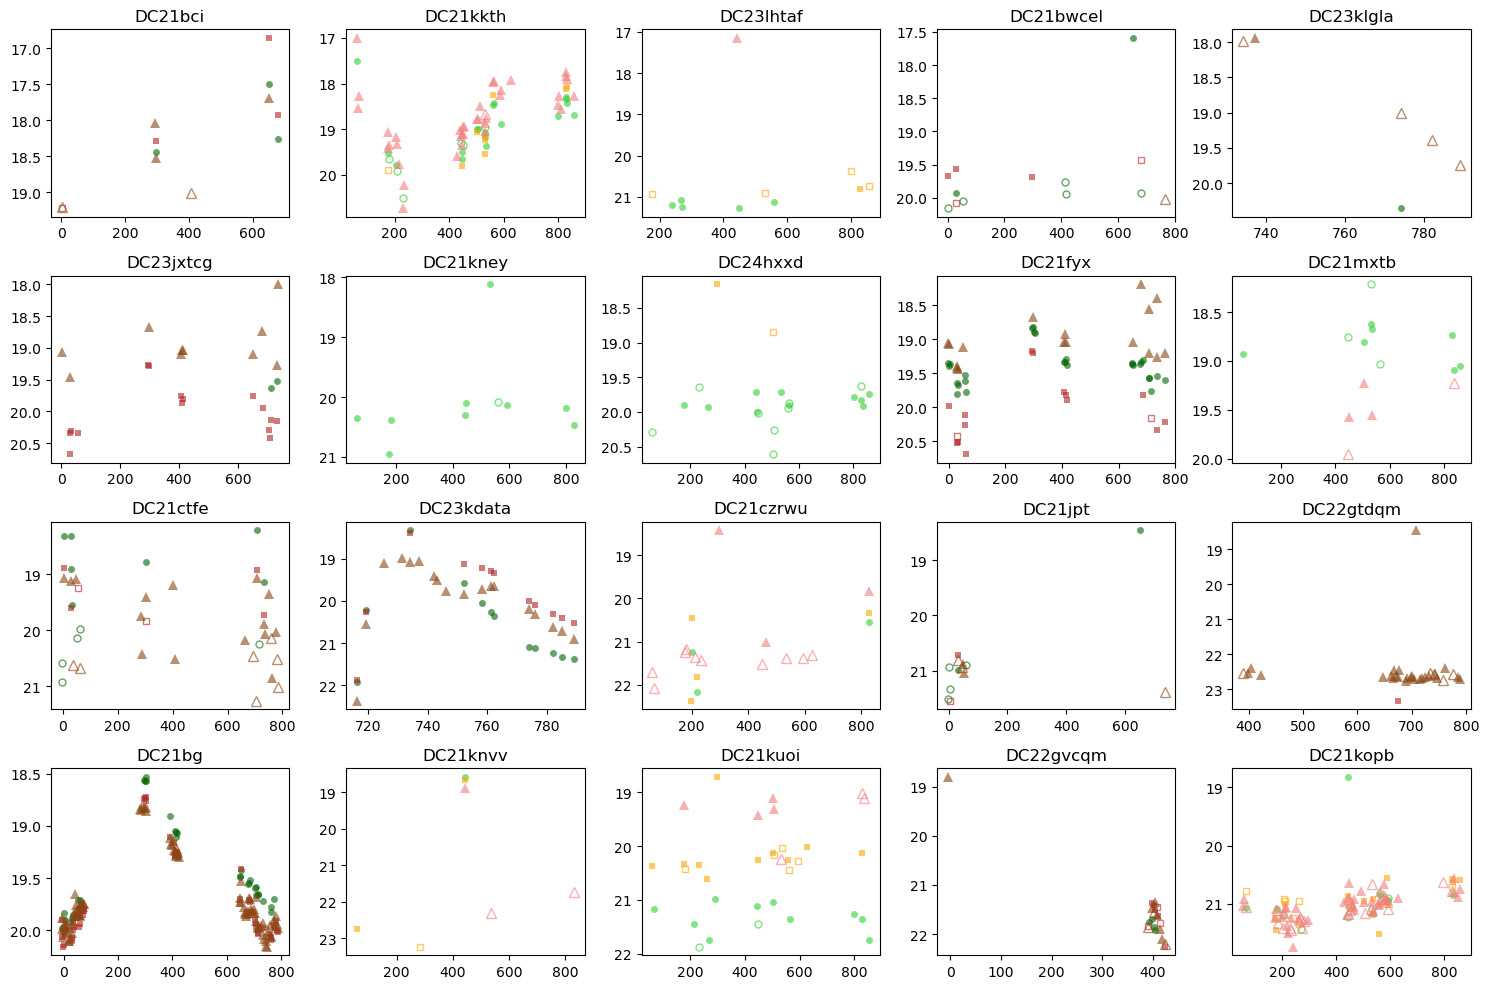

In [13]:
tx = np.where(paramLC_neps > 1)[0]
sx = np.argsort(paramLC_minmag[tx])

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

s = 0
for i in range(4):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            clr_i = f
            if paramLC_field[tx[sx[s]]] == 'ELAIS':
                clr_i = f+3
            cx0 = np.where((candLC_candid == paramLC_candid[tx[sx[s]]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[tx[sx[s]]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
            ax[i,j].plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            ax[i,j].plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none' )
            del cx0, cx1
        ax[i,j].invert_yaxis()
        ax[i,j].set_title(paramLC_candid[tx[sx[s]]])
        s += 1

plt.tight_layout()
plt.show()
del tx, sx, s

### 3.2. The 20 largest amplitude in the _g_ filter

**Warning**: Use amplitude _in a single filter_ as the demo here, because "the amplitude in _any_ filter" can be due more to color than change in brightness.

Several look like SNe; e.g., DC22iykha looks like a supernova.
Others like variable stars. This is very promising.

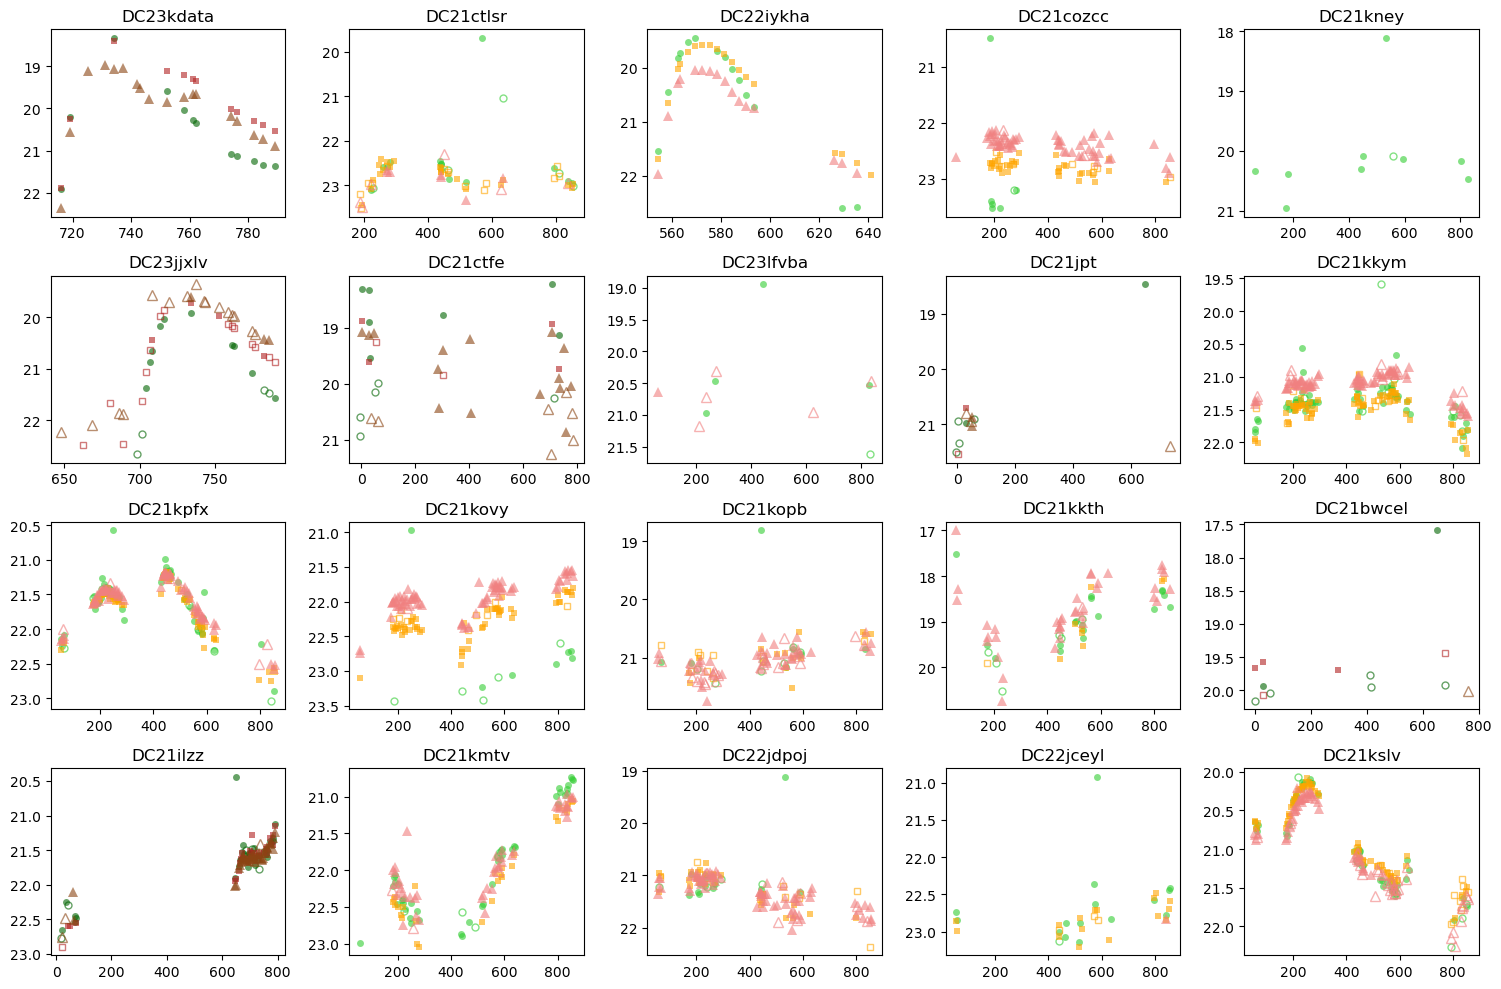

In [14]:
sx = np.flip(np.argsort(paramLC_amp_g))

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

s = 0
for i in range(4):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            clr_i = f
            if paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
            ax[i,j].plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            ax[i,j].plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none' )
            del cx0, cx1
        ax[i,j].invert_yaxis()
        ax[i,j].set_title(paramLC_candid[sx[s]])
        s += 1

plt.tight_layout()
plt.show()
del sx,s

### 3.3. The 20 candidates with the most epochs in any filter

They're all in ELAIS (can tell by colors), which makes sense because ELAIS had more epochs, total.

Recall:
 * 84  unique COSMOS epochs
 * 97  unique ELAIS epochs

These mostly look like AGN, which makes sense as they can "always" be seen.

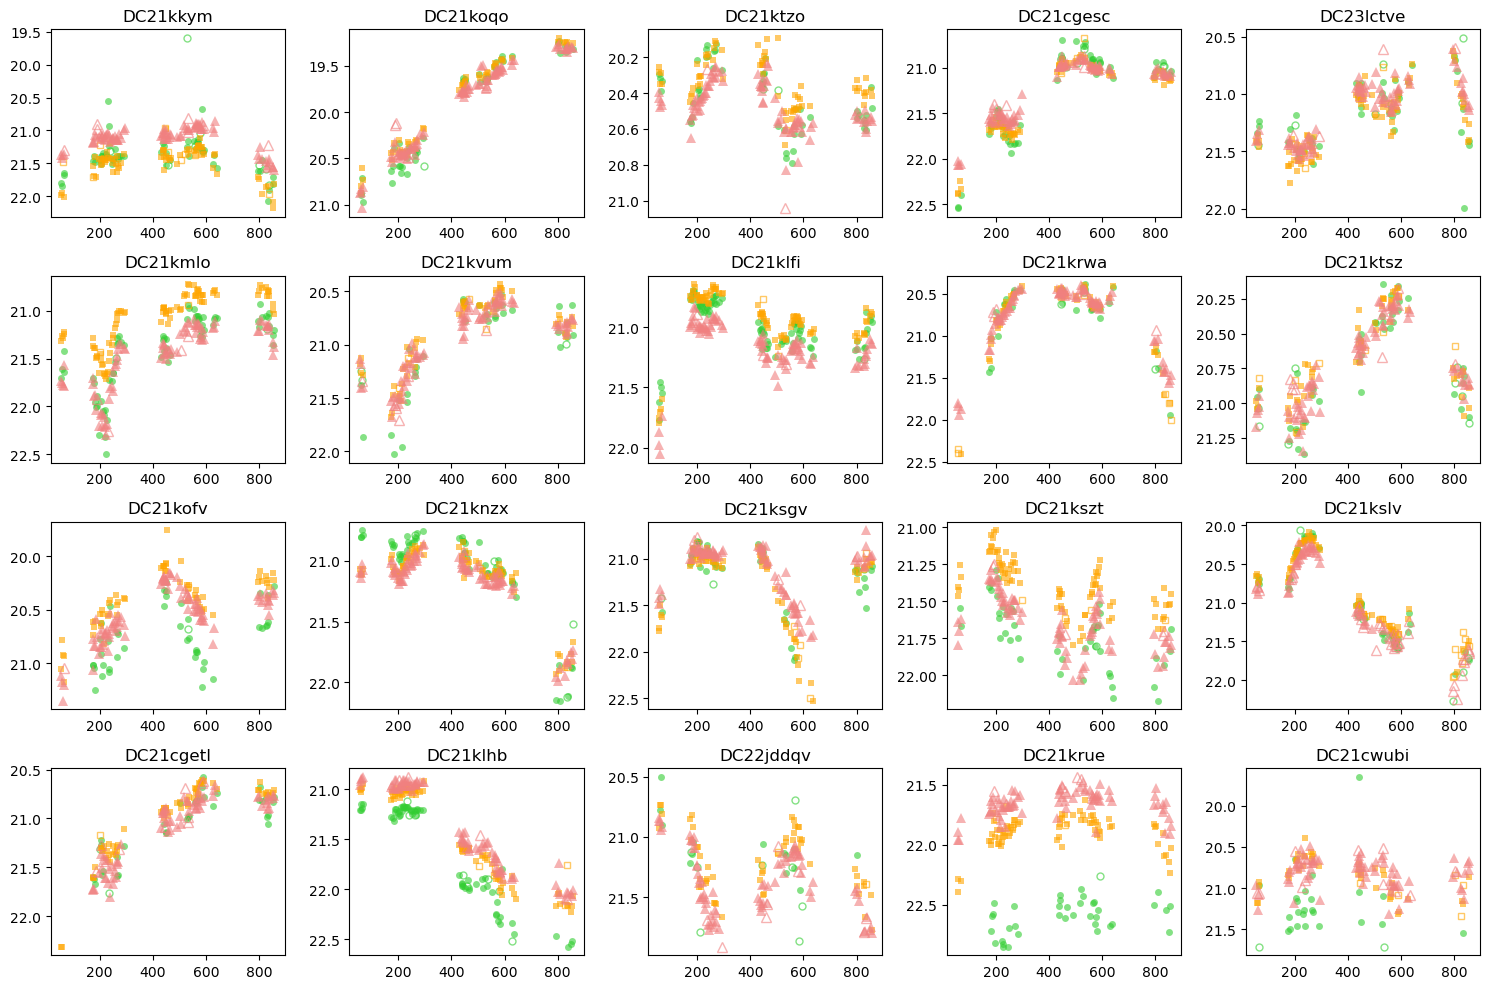

In [15]:
sx = np.flip(np.argsort(paramLC_neps))

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

s = 0
for i in range(4):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            clr_i = f
            if paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
            ax[i,j].plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            ax[i,j].plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none' )
            del cx0, cx1
        ax[i,j].invert_yaxis()
        ax[i,j].set_title(paramLC_candid[sx[s]])
        s += 1

plt.tight_layout()
plt.show()
del sx,s

### 3.4. A random sample of 20 "transient-Like"

A time span of 20-120 days, and an amplitude of at least 0.5 mag, in _every_ filter.

Lots of supernova-like lightcurves here.

Total number which met criteria:  47


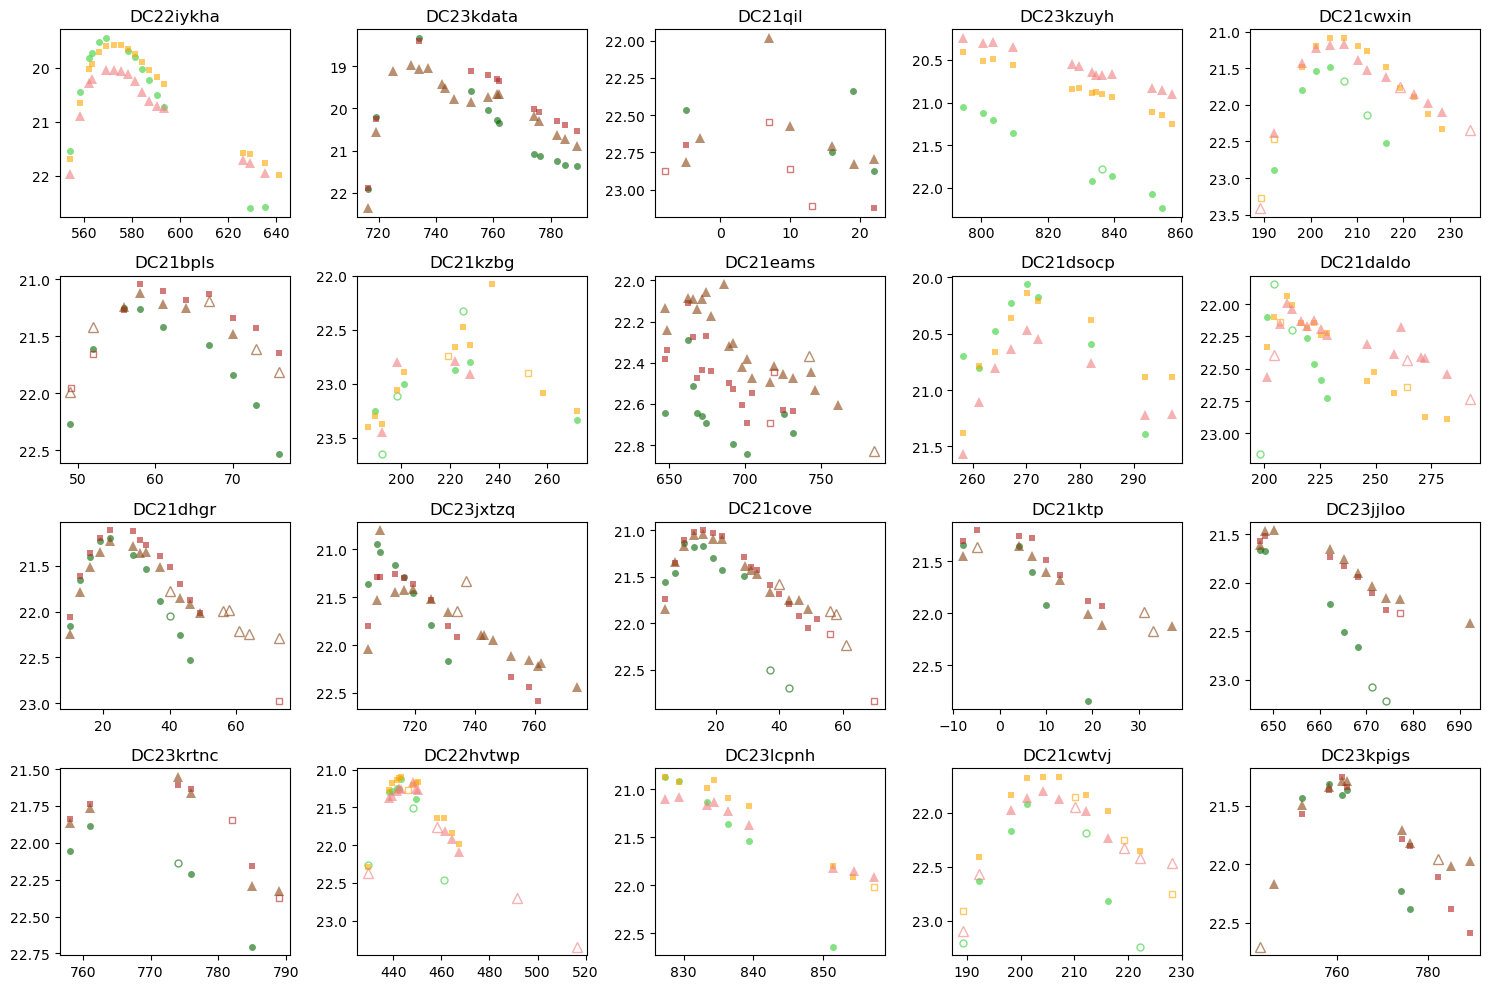

In [16]:
sx = np.where((paramLC_tspan_g > 20) & (paramLC_tspan_r > 20) & (paramLC_tspan_i > 20) &
               (paramLC_tspan_g < 120) & (paramLC_tspan_r < 120) & (paramLC_tspan_i < 120) &
               (paramLC_amp_g > 0.5) & (paramLC_amp_r > 0.5) & (paramLC_amp_i > 0.5))[0]
print('Total number which met criteria: ', len(sx))
np.random.shuffle(sx)

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

s = 0
for i in range(4):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            clr_i = f
            if paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
            ax[i,j].plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            ax[i,j].plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none' )
            del cx0, cx1
        ax[i,j].invert_yaxis()
        ax[i,j].set_title(paramLC_candid[sx[s]])
        s += 1

plt.tight_layout()
plt.show()
del sx,s

### 3.5. Short-duration transient phenomena

 * Short timespan (0.0 to 20 days) in every filter.
 * Reaches a peak of at least 22 mag in any filter.
 * Has an amplitude of at least 0.5 mag in g, r, or i filter.

Display the time span and the amplitude in the upper left corner.

Some appear to be "short duration" just by being partial lightcurves,
but at least DC22icaog seems to have a rise and fall, just over two weeks.

Total number which met criteria:  42


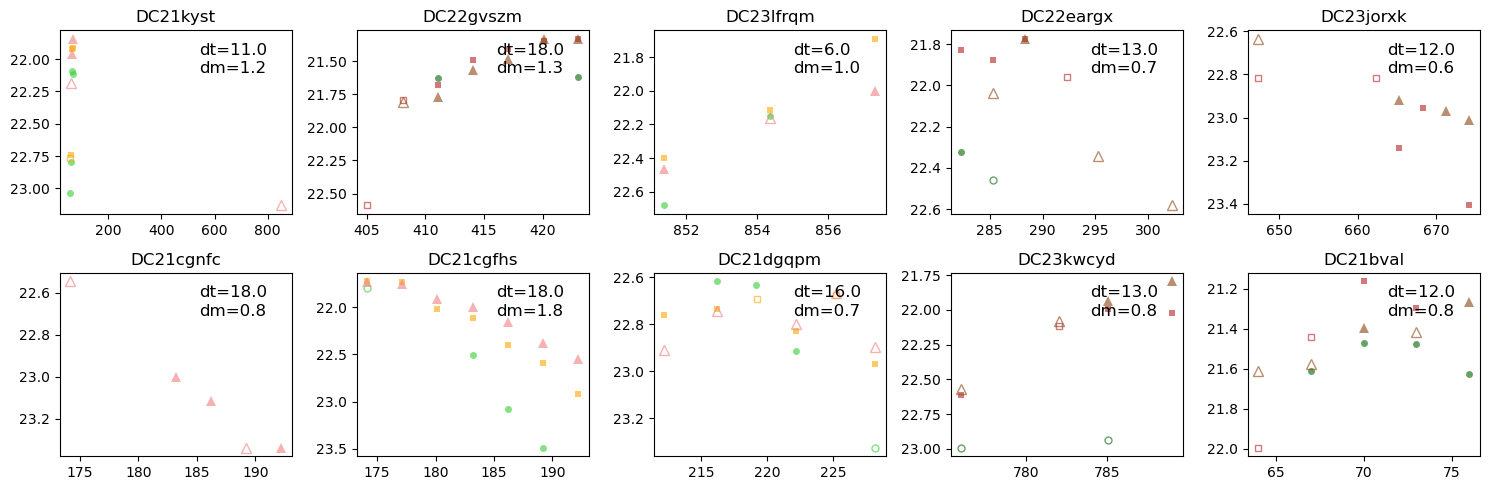

In [17]:
sx = np.where((((paramLC_tspan_g >= 0.0) & (paramLC_tspan_g <= 20)) & 
               ((paramLC_tspan_r >= 0.0) & (paramLC_tspan_r <= 20)) & 
               ((paramLC_tspan_i >= 0.0) & (paramLC_tspan_i <= 20))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
print('Total number which met criteria: ', len(sx))
np.random.shuffle(sx)

fig, ax = plt.subplots( 2, 5, figsize=(15, 5), sharex=False, sharey=False )

s = 0
for i in range(2):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            clr_i = f
            if paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
            ax[i,j].plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            ax[i,j].plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none' )
            del cx0, cx1
        ax[i,j].invert_yaxis()
        ax[i,j].set_title(paramLC_candid[sx[s]])
        ax[i,j].text(0.60, 0.85, 'dt='+str(np.round(paramLC_tspan[sx[s]],0)), fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        ax[i,j].text(0.60, 0.75, 'dm='+str(np.round(paramLC_amp[sx[s]],1)), fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        s += 1

plt.tight_layout()
plt.show()
del sx,s